# Import The dependencies

In [25]:
import os

import numpy as np
import pandas as pd
import random

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Load the data

In [8]:
path_lstm_data = "../collected_data/data_for_lstm/"

dict_data = dict()
list_data = list()

for dir_path in os.listdir(path_lstm_data):
    y_data_samples = []
    x_data_samples = []
    for file_name in os.listdir(path_lstm_data + f"{dir_path}"):
        dict_data[int(dir_path)] = []
        data_rec = pd.read_csv(path_lstm_data + f"{dir_path}/{file_name}")

        x_data = data_rec[['vertices', 'redexes', 'redex_depths', 'heights', 'widths']].to_numpy()
        y_data = data_rec["steps_time"].to_numpy()
        x_data_samples.append(x_data)
        y_data_samples.append(y_data)
        list_data.append((x_data, y_data))
    dict_data[int(dir_path)] = (np.array(x_data_samples), np.array(y_data_samples))

In [9]:
random.shuffle(list_data)

In [10]:
list_data

[(array([[-0.38390775, -0.94809855,  0.3217759 , -0.35058183, -0.28242433],
         [-0.47353117, -0.94809855, -0.41954913, -0.62868147, -0.37627972],
         [-0.38390775, -0.44247627, -1.16658339, -0.62868147, -0.47056083],
         [ 0.08386582,  0.1722039 ,  1.05858274,  0.29725674, -0.00317148],
         [-0.20659569, -0.01888615,  0.3217759 ,  0.29725674, -0.18896921],
         [-0.29494273, -0.01888615, -0.41954913, -0.04219613, -0.28242433],
         [-0.38390775, -0.22280995, -0.41954913, -0.62868147, -0.37627972],
         [ 1.38739592,  1.13873774,  1.05858274,  1.07231289,  1.44285233],
         [ 1.38739592,  1.41410717,  1.79165336,  1.07231289,  1.35415543],
         [ 1.30658105,  1.41410717,  1.05858274,  1.07231289,  1.26526886],
         [ 0.81555401,  0.84358872,  0.3217759 ,  1.07231289,  0.81777324],
         [ 0.73259923,  0.84358872, -0.41954913,  1.07231289,  0.72761218],
         [-1.73699336, -1.6135389 , -1.16658339, -1.80335281, -1.75924497],
         [-1

In [3]:
print(dict_data[2])

(array([[[ 1.,  1., -1.,  0.,  1.],
        [-1., -1.,  1.,  0., -1.]],

       [[ 1.,  1., -1.,  1.,  1.],
        [-1., -1.,  1., -1., -1.]],

       [[ 1.,  1.,  1.,  0.,  1.],
        [-1., -1., -1.,  0., -1.]],

       [[-1.,  1., -1.,  1., -1.],
        [ 1., -1.,  1., -1.,  1.]],

       [[ 1.,  1., -1.,  0.,  1.],
        [-1., -1.,  1.,  0., -1.]],

       [[ 1.,  1., -1.,  1.,  1.],
        [-1., -1.,  1., -1., -1.]],

       [[ 1.,  0.,  1.,  0.,  1.],
        [-1.,  0., -1.,  0., -1.]],

       [[ 1.,  0.,  1.,  0.,  1.],
        [-1.,  0., -1.,  0., -1.]],

       [[ 1.,  1., -1.,  1.,  1.],
        [-1., -1.,  1., -1., -1.]],

       [[ 1.,  1., -1.,  0.,  1.],
        [-1., -1.,  1.,  0., -1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1., -1.]],

       [[ 1.,  0.,  1.,  0.,  1.],
        [-1.,  0., -1.,  0., -1.]],

       [[ 1.,  1., -1.,  1.,  1.],
        [-1., -1.,  1., -1., -1.]],

       [[ 1.,  1., -1.,  1.,  1.],
        [-1., -1.,  1., -1.,

# Define the LSTM model

In [68]:
def create_lstm_model(input_shape=(None, 5)):
    model_ = Sequential()
    model_.add(LSTM(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model_.add(Dense(1))

    model_.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-4))
    return model_


def train_model(model_, x_train_data, y_train_data, epochs=1, batch_size=1):
    return model_.fit(x_train_data, y_train_data, epochs=epochs, batch_size=batch_size)

In [69]:
model = create_lstm_model()

In [11]:
x = [sample[0] for sample in list_data]
y = [sample[1] for sample in list_data]

In [19]:
# count_epochs = 1
# for epoch in range(count_epochs):
#     print(f"{epoch}:\n")
#
#     random.shuffle(list_data)
#     for xtd, ytd in list_data:
#         train_model(model, xtd, ytd)

0:



ValueError: in user code:

    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 5)


In [49]:
count_epochs = 10
histories = []

for epoch in range(count_epochs):
    print(f"{epoch}:\n")

    rand_keys = list(dict_data.keys())
    random.shuffle(rand_keys)
    for key_ in rand_keys:
        xtd, ytd = dict_data[key_]
        histories.append((key_, train_model(model, xtd, ytd)))

0:

53/53 [==============================] - 6s 115ms/step - loss: nan
1:

9/9 [==============================] - 1s 166ms/step - loss: nan
2:

36/36 [==============================] - 2s 51ms/step - loss: nan
3:

1/1 [==============================] - 0s 245ms/step - loss: nan
4:

1/1 [==============================] - 0s 176ms/step - loss: nan
5:

1/1 [==============================] - 0s 188ms/step - loss: nan
6:

39/39 [==============================] - 3s 86ms/step - loss: nan
7:

21/21 [==============================] - 0s 19ms/step - loss: nan
8:

7/7 [==============================] - 1s 189ms/step - loss: nan
9:

3/3 [==============================] - 1s 204ms/step - loss: nan


In [32]:
losses = []
steps = []
dict_step_loss = dict()

for history in histories:
    losses.append(history[1].history["loss"][0])
    steps.append(history[0])
    if history[0] in dict_step_loss:
        dict_step_loss[history[0]].append(history[1].history["loss"][0])
    else:
        dict_step_loss[history[0]] = [history[1].history["loss"][0], ]

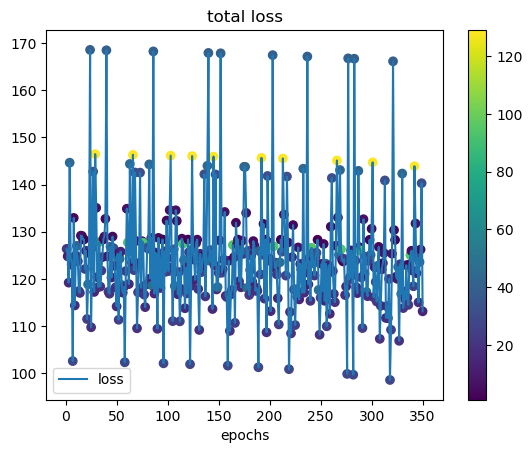

In [31]:
epoch_array = range(1, len(losses) + 1)

plt.plot(epoch_array, losses, label="loss")
plt.scatter(epoch_array, losses, c=steps)
plt.colorbar()
plt.xlabel("epochs")
plt.title("total loss")

plt.legend()
plt.show()

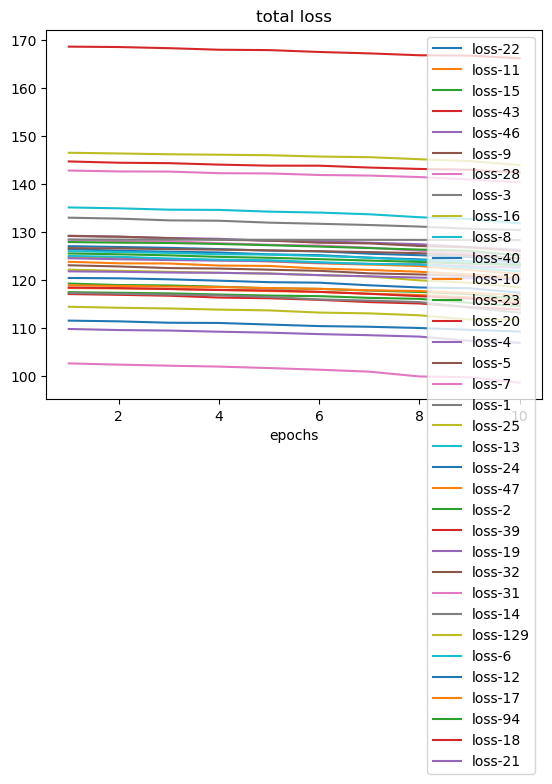

In [33]:
for key_, val_ in dict_step_loss.items():
    plt.plot(range(1, len(val_) + 1), val_, label=f"loss-{key_}")

plt.xlabel("epochs")
plt.title("total loss")

plt.legend()
plt.show()

In [71]:
def train_generator():
    random.shuffle(list_data)
    for xtd, ytd in list_data:
        yield np.array([xtd]), np.array([ytd])

model.fit(train_generator(), steps_per_epoch=1_000, epochs=10, verbose=1)

Epoch 1/10
 205/1000 [=====>........................] - ETA: 1:17 - loss: nan

KeyboardInterrupt: 

In [61]:
for x, y in train_generator():
    print(x, "\n", y)
    break

[[[ 1.58089156  1.58306028  0.30385846  1.11752917  1.50448619]
  [ 1.25497517  1.06218579  1.40810916  1.11752917  1.22737845]
  [ 0.94086226  1.06218579  1.2127568   1.43344018  0.95945356]
  [ 0.44420163  0.50658857  0.30385846  0.81419959  0.45160425]
  [ 0.16273753 -0.09386065 -0.5988439   0.2459205   0.21192381]
  [-0.10598271 -0.75579925 -0.5988439  -0.2700057  -0.01808408]
  [-0.36164502 -1.5106446  -1.42386943 -0.2700057  -0.2382752 ]
  [-0.36164502  0.50658857  0.7878996  -0.73195416 -0.44849419]
  [-0.6039021  -0.09386065  1.00657808 -0.73195416 -0.64857298]
  [-0.83236674 -0.75579925 -0.9776339  -0.73195416 -0.83832872]
  [-2.11812656 -1.5106446  -1.42386943 -1.99274475 -2.1630911 ]]] 
 [[12.36273446 12.97792241 12.8236608  12.33519559 11.76797845 11.52111186
  11.05030253 11.95446532 12.02570119 11.06430752  9.07555105]]


# Test the model

In [15]:
model.predict(x[0])

ValueError: in user code:

    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 5)


# Save the model

# Some tests

In [7]:
# Generate sample data
# Replace this with your own data
def generate_sample_data(num_timesteps=5, num_features=5):
    np.random.seed(0)
    num_samples = 1000
    X = np.random.rand(num_samples, num_timesteps, num_features)
    y = np.random.rand(num_samples, 1)
    return X, y


# Create the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, activation='relu'))
    model.add(Dense(1))
    return model


# Compile the model
def compile_model(model):
    model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model
def train_model(model, X, y, epochs=10, batch_size=32):
    model.fit(X, y, epochs=epochs, batch_size=batch_size)

In [8]:
# Example usage
X, y = generate_sample_data()
num_timesteps, num_features = X.shape[1], X.shape[2]
model = create_lstm_model(input_shape=(None, num_features))
compile_model(model)
train_model(model, X, y)

# Once the model is trained, you can use it for predictions
# Replace `new_data` with your new input data for prediction
new_data = np.random.rand(5, num_timesteps, num_features)
prediction = model.predict(new_data)
print("Predicted time spent on step:", prediction[0][0])

Epoch 1/10
32/32 [==============================] - 5s 64ms/step - loss: 0.1727
Epoch 2/10
32/32 [==============================] - 2s 61ms/step - loss: 0.0837
Epoch 3/10
32/32 [==============================] - 2s 64ms/step - loss: 0.0840
Epoch 4/10
32/32 [==============================] - 2s 64ms/step - loss: 0.0807
Epoch 5/10
32/32 [==============================] - 2s 55ms/step - loss: 0.0837
Epoch 6/10
32/32 [==============================] - 2s 51ms/step - loss: 0.0806
Epoch 7/10
32/32 [==============================] - 2s 56ms/step - loss: 0.0821
Epoch 8/10
32/32 [==============================] - 2s 50ms/step - loss: 0.0842
Epoch 9/10
32/32 [==============================] - 2s 53ms/step - loss: 0.0821
Epoch 10/10
32/32 [==============================] - 2s 48ms/step - loss: 0.0834
Predicted time spent on step: 0.5284022


In [13]:
X, y = generate_sample_data(num_timesteps=10)
train_model(model, X, y)

Epoch 1/10
32/32 [==============================] - 4s 82ms/step - loss: 0.0885
Epoch 2/10
32/32 [==============================] - 3s 81ms/step - loss: 0.0845
Epoch 3/10
32/32 [==============================] - 2s 73ms/step - loss: 0.0859
Epoch 4/10
32/32 [==============================] - 2s 74ms/step - loss: 0.0841
Epoch 5/10
32/32 [==============================] - 2s 72ms/step - loss: 0.0847
Epoch 6/10
32/32 [==============================] - 2s 69ms/step - loss: 0.0839
Epoch 7/10
32/32 [==============================] - 2s 76ms/step - loss: 0.0838
Epoch 8/10
32/32 [==============================] - 2s 70ms/step - loss: 0.0834
Epoch 9/10
32/32 [==============================] - 3s 80ms/step - loss: 0.0836
Epoch 10/10
32/32 [==============================] - 3s 84ms/step - loss: 0.0844


In [14]:
X, y = generate_sample_data(num_timesteps=100)
train_model(model, X, y)

Epoch 1/10
32/32 [==============================] - 22s 660ms/step - loss: 0.0857
Epoch 2/10
32/32 [==============================] - 22s 702ms/step - loss: 0.0853
Epoch 3/10
32/32 [==============================] - 21s 663ms/step - loss: 0.0859
Epoch 4/10
32/32 [==============================] - 21s 667ms/step - loss: 0.0849
Epoch 5/10
32/32 [==============================] - 19s 594ms/step - loss: 0.0844
Epoch 6/10
32/32 [==============================] - 23s 709ms/step - loss: 0.0845
Epoch 7/10
32/32 [==============================] - 24s 762ms/step - loss: 0.0841
Epoch 8/10
32/32 [==============================] - 24s 751ms/step - loss: 0.0841
Epoch 9/10
32/32 [==============================] - 24s 739ms/step - loss: 0.0836
Epoch 10/10
32/32 [==============================] - 19s 583ms/step - loss: 0.0835


In [ ]:
model.summary()

In [9]:
for row in X:
    print(row, "\n")

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]] 

[[0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898 ]
 [0.6176355  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263  0.31542835 0.36371077]] 

[[0.57019677 0.43860151 0.98837384 0.10204481 0.20887676]
 [0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236]
 [0.36872517 0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358]] 

[[0.03918779 0.28280696 0.12019656 0.2961402  0.11872772]
 [0.31798318 0.41426299 0.0641475  0.69247212 0.56660145]
 [0.2

In [10]:
print(y)

[[0.8812033 ]
 [0.53122103]
 [0.8680575 ]
 [0.77755907]
 [0.96932112]
 [0.92571412]
 [0.16927561]
 [0.57996402]
 [0.02856338]
 [0.68828411]
 [0.54150551]
 [0.14278145]
 [0.66640611]
 [0.36708941]
 [0.09459162]
 [0.00299151]
 [0.60631975]
 [0.79011012]
 [0.47399445]
 [0.36391856]
 [0.75603037]
 [0.0063267 ]
 [0.80624946]
 [0.14631303]
 [0.2934198 ]
 [0.61383733]
 [0.8059898 ]
 [0.14708033]
 [0.66029159]
 [0.40847581]
 [0.25638414]
 [0.39374154]
 [0.38463804]
 [0.83570583]
 [0.53699062]
 [0.84165466]
 [0.16601442]
 [0.83759583]
 [0.3109018 ]
 [0.71662891]
 [0.49894272]
 [0.59874476]
 [0.64255778]
 [0.64013713]
 [0.93336891]
 [0.68057536]
 [0.57611589]
 [0.27045168]
 [0.83392349]
 [0.2913378 ]
 [0.46407066]
 [0.38620976]
 [0.51723503]
 [0.96851869]
 [0.04338821]
 [0.52355474]
 [0.20492708]
 [0.12709019]
 [0.50011878]
 [0.53641198]
 [0.69838596]
 [0.28335574]
 [0.01419542]
 [0.42349172]
 [0.29702545]
 [0.94713859]
 [0.44958176]
 [0.80243926]
 [0.971418  ]
 [0.07014468]
 [0.66927981]
 [0.82

In [52]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from keras.utils import to_categorical
import numpy as np

model = Sequential()

model.add(LSTM(32, return_sequences=True, input_shape=(None, 5)))
model.add(LSTM(8, return_sequences=True))
model.add(TimeDistributed(Dense(2, activation='sigmoid')))

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, None, 32)          4864      
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 8)           1312      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 2)           18        
Total params: 6,194
Trainable params: 6,194
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
model = Sequential()

model.add(LSTM(32, return_sequences=True, input_shape=(None, 5)))
model.add(LSTM(8, return_sequences=True))
model.add(Dense(2, activation='sigmoid'))

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, None, 32)          4864      
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 8)           1312      
_________________________________________________________________
dense_8 (Dense)              (None, None, 2)           18        
Total params: 6,194
Trainable params: 6,194
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam')

def train_generator():
    while True:
        sequence_length = np.random.randint(10, 100)
        x_train = np.random.random((1000, sequence_length, 5))
        # y_train will depend on past 5 timesteps of x
        y_train = x_train[:, :, 0]
        for i in range(1, 5):
            y_train[:, i:] += x_train[:, :-i, i]
        y_train = to_categorical(y_train > 2.5)
        yield x_train, y_train

model.fit_generator(train_generator(), steps_per_epoch=30, epochs=10, verbose=1)

c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
30/30 [==============================] - 49s 93ms/step - loss: 0.6902
Epoch 2/10
30/30 [==============================] - 2s 58ms/step - loss: 0.6694
Epoch 3/10
30/30 [==============================] - 2s 63ms/step - loss: 0.6075
Epoch 4/10
30/30 [==============================] - 2s 55ms/step - loss: 0.5010
Epoch 5/10
30/30 [==============================] - 2s 60ms/step - loss: 0.3892
Epoch 6/10
30/30 [==============================] - 2s 62ms/step - loss: 0.3069
Epoch 7/10
30/30 [==============================] - 2s 54ms/step - loss: 0.2476
Epoch 8/10
30/30 [==============================] - 2s 49ms/step - loss: 0.2026
Epoch 9/10
30/30 [==============================] - 2s 52ms/step - loss: 0.1698
Epoch 10/10
30/30 [==============================] - 2s 56ms/step - loss: 0.1453
